In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster, cophenet
from scipy.spatial.distance import pdist

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'

In [3]:
plot_h = pd.read_table(analysis+'/intermediate_results/arch_proteins_for_abundance_plot_1.tsv')
plot_u = pd.read_table(analysis+'/intermediate_results/unique_arch_proteins_for_abundance_plot.tsv')

In [4]:
plot_u_mt = pd.read_table(analysis+'/intermediate_results/2plot_expression_uniq.tsv',
                          names=['cluster', 'id', 'description', 'expression'], skiprows=1)
plot_u_upd = plot_u.merge(plot_u_mt, on=['id'])

In [5]:
plot_u_upd = plot_u_upd[['arch_cluster_kegg', 'protein_count', 'description_x', 'expression']]

In [6]:
plot_h_mt = pd.read_table(analysis+'/intermediate_results/2plot_expression_homo_arch_filtered.tsv',
                          names=['cluster', 'id', 'description', 'expression'], skiprows=1)
plot_h_upd = plot_h.merge(plot_h_mt, on=['description'])
plot_h_upd.drop(plot_h_upd.iloc[11].name, inplace=True)
plot_h_upd.drop(plot_h_upd.iloc[11].name, inplace=True)
plot_h_upd.head()

cluster_id                                   description  \
0  h1,h2,h3,h4,h5,h6_K14495                            F-box protein GID2   
1                 h7_K11234                 mating pheromone alpha-factor   
2                 h8_K12090            cag pathogenicity island protein 5   
3                 h9_K06407                stage V sporulation protein AE   
4                h10_K10436  microtubule-associated protein, RP/EB family   

   count_arch  count_bac       cluster      id  expression  
0      210.72       0.23  h1,2,3,4,5,6  K14495        0.18  
1       81.62       0.33            h7  K11234        0.67  
2       67.75       1.07            h8  K12090        1.75  
3       52.81     138.95            h9  K06407        1.91  
4       50.15       0.60           h10  K10436        0.30

<BarContainer object of 28 artists>

Text(0, 0.5, 'relative protein abundance')

<BarContainer object of 28 artists>

Text(0, 0.5, 'average MT read coverage')

<BarContainer object of 35 artists>

<BarContainer object of 35 artists>

Text(0, 0.5, 'relative protein abundance')

<BarContainer object of 35 artists>

Text(0, 0.5, 'average MT read coverage')

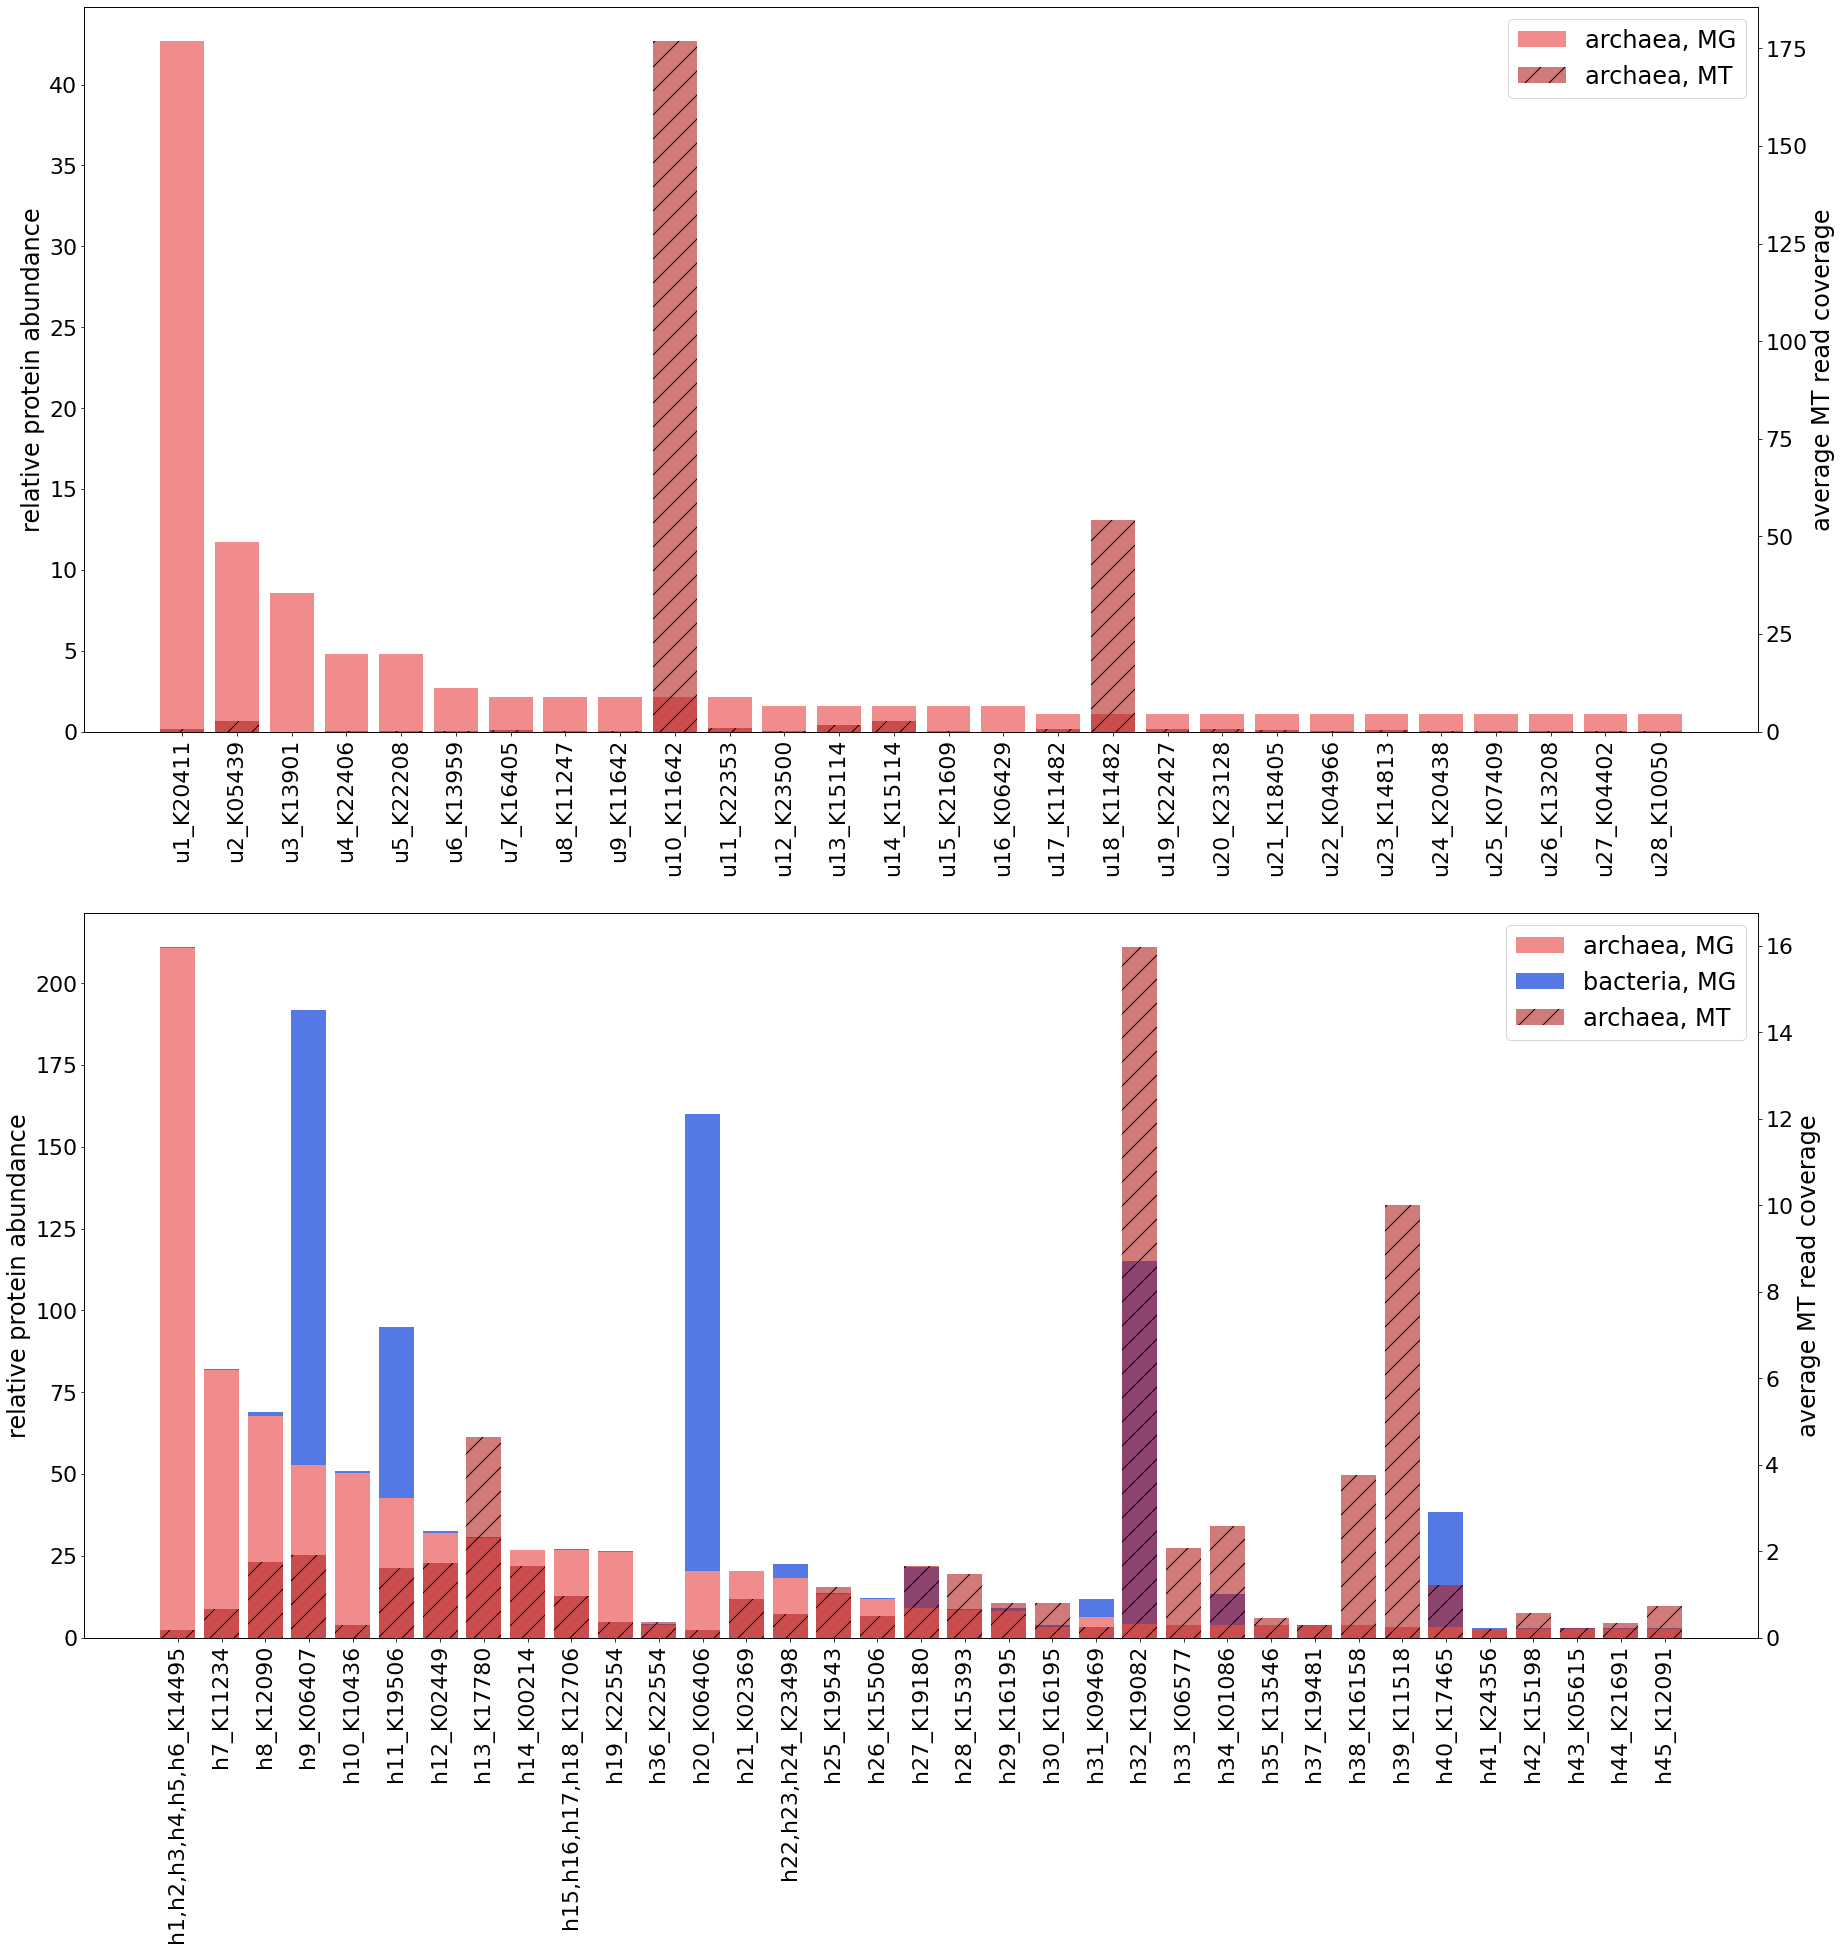

In [10]:
fig, axs = plt.subplots(2, sharey=False)
# fig.suptitle('Vertically stacked subplots', fontsize=30)

fig.set_figwidth(30)
fig.set_figheight(30)

# fig.tight_layout()

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size


# unqiue
labels_u = plot_u_upd.arch_cluster_kegg
ax1 = axs[0]
ax2 = axs[0].twinx()
ax1.bar(labels_u, plot_u_upd.protein_count, label='archaea, MG', color = 'lightcoral',
              alpha=0.9)
ax1.set_ylabel('relative protein abundance', fontsize = 24)
ax1.tick_params(axis='x', rotation=90)
ax2.bar(labels_u, plot_u_upd.expression, label='archaea, MT', color = 'firebrick', 
               hatch = "/", alpha=0.6)
ax2.set_ylabel('average MT read coverage', fontsize = 24)
ax2.tick_params(axis='x', rotation=90)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0, fontsize = 24)


# homological
labels_h = plot_h_upd.cluster_id
bottoms = plot_h_upd.count_arch
ax3 = axs[1]
ax4 = axs[1].twinx()
ax3.bar(labels_h, plot_h_upd.count_arch, label='archaea, MG', color = 'lightcoral',
       alpha=0.9)
ax3.bar(labels_h, plot_h_upd.count_bac, bottom=bottoms,  label='bacteria, MG', color = 'royalblue',
       alpha=0.9)
ax3.set_ylabel('relative protein abundance', fontsize = 24)
ax3.tick_params(axis='x', rotation=90)
ax4.bar(labels_h, plot_h_upd.expression, label='archaea, MT', color = 'firebrick', 
               hatch = "/", alpha=0.6)
ax4.set_ylabel('average MT read coverage', fontsize = 24)
ax4.tick_params(axis='x', rotation=90)

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines3 + lines4, labels3 + labels4, loc=0, fontsize = 24)



plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)
# fig.subplots_adjust(bottom=0.7)

plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/\
relative_abundance_subplot_MG+MT.tiff', 
            format='tiff', dpi=600, bbox_inches='tight')

plt.show()

In [7]:
# # original

# fig, axs = plt.subplots(2, sharey=False)
# # fig.suptitle('Vertically stacked subplots', fontsize=30)

# fig.set_figwidth(30)
# fig.set_figheight(30)

# # fig.tight_layout()

# label_size = 22
# plt.rcParams['xtick.labelsize'] = label_size
# plt.rcParams['ytick.labelsize'] = label_size

# labels_u = plot_u_upd.arch_cluster_kegg
# axs[0].bar(labels_u, plot_u_upd.protein_count, label='archaea', color = 'lightcoral')
# axs[0].bar(labels_u, plot_u_upd.expression, label='archaea', color = 'lavenderblush', hatch = "/")
# axs[0].set_ylabel('relative protein counts', fontsize = 24)
# axs[0].tick_params(axis='x', rotation=90)
# axs[0].legend(fontsize = 24)

# labels_h = plot_h.cluster_id
# bottoms = plot_h.count_arch
# axs[1].bar(labels_h, plot_h.count_arch, label='archaea', color = 'lightcoral')
# axs[1].bar(labels_h, plot_h.count_bac, bottom=bottoms,  label='bacteria', color = 'forestgreen')
# axs[1].set_ylabel('relative protein counts', fontsize = 24)
# axs[1].tick_params(axis='x', rotation=90)
# axs[1].legend(fontsize = 24)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)
# # fig.subplots_adjust(bottom=0.7)

# # plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/\
# # relative_abundance_subplot.tiff', 
# #             format='tiff', dpi=600, bbox_inches='tight')

# plt.show()